In [1]:
!pip install datasets
!pip install rouge_score

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 441 kB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 107 kB/s s eta 0:00:01
     |████████████████████████████████| 212 kB 97.0 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 127.6 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 90.4 MB/s eta 0:00:01
     |████████████████████████████████| 35.3 MB 30.4 MB/s eta 0:00:01
  Using cached huggingface_hub-0.10.1-py3-none-any.whl (163 kB)
     |████████████████████████████████| 262 kB 83.8 MB/s eta 0:00:01
     |████████████████████████████████| 161 kB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 9.5 MB/s eta 0:00:01
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from datasets import load_from_disk
scored_dataset = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/processed_shards/shard_10")
scored_dataset

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['document', 'summary', 'rouge_scores', 'entity_counts'],
    num_rows: 1125
})

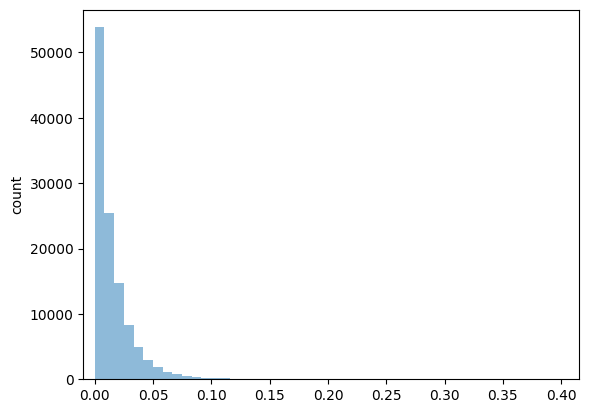

In [3]:
rouge_score_all = np.array([item for sublist in scored_dataset['rouge_scores'] for item in sublist])

plt.hist(rouge_score_all, bins=50, alpha=0.5)
plt.xlim([min(rouge_score_all)-0.01, max(rouge_score_all)])
plt.ylabel('count')
plt.show()

In [4]:
len(rouge_score_all[np.where(rouge_score_all>0.01)])/len(rouge_score_all)

0.4798583520469857

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [11]:
# text = nlp(scored_dataset['document'])
len(scored_dataset['document'])

1125

In [35]:
doc = nlp(scored_dataset["document"][0])
sentences = list(str(i) for i in doc.sents)
sentences[7]


"||||| After both Jennifer Aniston and Matt Lauer nominated him, Howard Stern finally accepted the Ice Bucket Challenge - and you won't believe who he nominated! \n \n "

In [36]:
sentences[7].strip().strip('||||| ')

"After both Jennifer Aniston and Matt Lauer nominated him, Howard Stern finally accepted the Ice Bucket Challenge - and you won't believe who he nominated!"

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 115780

In [65]:
n = 3
doc1_score = np.array(scored_dataset['rouge_scores'][n])
doc = nlp(scored_dataset["document"][n])
sentences = list(str(i) for i in doc.sents)
np.array(sentences)[doc1_score<0.01]

array(['\n \n ', '\n \n ', '\n \n ', '\n \n ',
       'Curtis Dawkins with his children in 2003.',
       'Photograph: pr \n \n ',
       'Given the opportunity, Bowman said, he’d administer it himself. \n \n ',
       '\n \n ', '\n \n ', '\n \n ', '\n \n ',
       'But until the legal matter is resolved, Dawkins’ finances are effectively frozen.',
       '\n \n '], dtype='<U349')

In [62]:
sentences

['Dell is bound and determined to show that it can be a bigger player in the consumer market.',
 'The company also is trying to shake its reputation for stodgy design. \n \n ',
 'I’ve been testing two new Dells that aim to prove both points.',
 'One is a pricey, style-conscious, ultrathin laptop; the other is an economical all-in-one desktop with an optional touch screen that lets you flick through pictures, music and video, and perform other tasks, with just your fingers.',
 '\n \n ',
 'Both computers, the Adamo laptop and the Studio One 19 desktop, are attractive and functional.',
 'But neither is ground-breaking.',
 'The laptop is a belated competitor to superthin, high-end machines like Apple’s (AAPL) MacBook Air and Lenovo’s ThinkPad X300 series.',
 'The desktop is a belated competitor to Hewlett-Packard’s (HPQ) TouchSmart touch-screen series.',
 '\n \n ',
 'Before getting into the physical attributes of these computers, a major caveat is in order: Both run Microsoft’s (MSFT) slug

In [60]:
sentences[0].replace("\n ", '')

"Rachael D'Amore, CTV Toronto The Toronto District School Board will join other schools in southwestern Ontario who have decided to cancel trips to the U.S., citing concerns over muddled U.S. border restrictions."